In [1]:
# Melhor Roteiro em Série Cômica

import requests
from bs4 import BeautifulSoup

planilha = []

links_episodios = ["https://www.imdb.com/title/tt8956332/?ref_=ttep_ep5",
                   "https://www.imdb.com/title/tt6733136/?ref_=ttep_ep1",
                   "https://www.imdb.com/title/tt8578788/?ref_=ttep_ep9",
                   "https://www.imdb.com/title/tt8820740/?ref_=ttep_ep9",
                   "https://www.imdb.com/title/tt7526214/?ref_=ttep_ep1",
                   "https://www.imdb.com/title/tt8709138/?ref_=ttep_ep3",
                   "https://www.imdb.com/title/tt7870762/?ref_=ttep_ep7"]

for link in links_episodios: # Pega cada link da lista de links para fazer a requisição
    requisicao = requests.get(link)

    sopa = BeautifulSoup(requisicao.content, "html.parser") # Dados brutos da página inteira
    
    # Conjunto que acha o nome da série
    acha_nome = sopa.find("div", {"class": "titleParent"})
    nome_serie = acha_nome.find("a").text

    # Conjunto que acha a temporada e o número do episódio
    acha_temp_episodio = sopa.find("div", {"class": "bp_description"})
    temp_episodio = acha_temp_episodio.find("div", {"class": "bp_heading"}).text.strip() # Temporada e episódio dentro da mesma tag separados por |
    lista = temp_episodio.split(" | ") # Comando split e cria uma lista com os dois itens
    temporada = lista[0] # Primeiro item da lista corresponde à temporada
    episodio = lista[1] # Segundo item da lista corresponde ao episódio
    temporada = temporada.replace("Season ", "") # Limpa para deixar só o número
    episodio = episodio.replace("Episode", "") # Limpa para deixar só o número
    
    # Conjunto que acha o nome do episódio
    acha_nome_episodio = sopa.find("div", {"class": "title_wrapper"}) # Div com o nome do episódio
    nome_episodio = acha_nome_episodio.find("h1").text.strip() # Limpa só o nome do episódio

    # Conjunto que acha a avaliação do episódio
    avaliacao = sopa.find("div", {"class": "imdbRating"})
    nota = avaliacao.find("span", {"itemprop": "ratingValue"}).text.strip()
    votos = avaliacao.find("span", {"itemprop": "ratingCount"}).text.strip()
    votos = votos.replace(",", "") # Limpa para poder converter para inteiro
    
    dicionario = {"serie": nome_serie, "temporada": temporada, "episodio": episodio, "nome_episodio": nome_episodio, "nota": float(nota), "votos": int(votos)} # Monta o dicionário
    planilha.append(dicionario) # Adiciona planilha ao dicionário
    
print(planilha)

[{'serie': 'Barry', 'temporada': '2', 'episodio': ' 5', 'nome_episodio': 'ronny/lily', 'nota': 9.8, 'votos': 3895}, {'serie': 'Fleabag', 'temporada': '2', 'episodio': ' 1', 'nome_episodio': 'Episode #2.1', 'nota': 9.4, 'votos': 1353}, {'serie': 'O Bom Lugar', 'temporada': '3', 'episodio': ' 9', 'nome_episodio': 'Janet(s)', 'nota': 9.2, 'votos': 1413}, {'serie': 'PEN15', 'temporada': '1', 'episodio': ' 9', 'nome_episodio': 'Anna Ishii-Peters', 'nota': 8.3, 'votos': 74}, {'serie': 'Boneca Russa', 'temporada': '1', 'episodio': ' 1', 'nome_episodio': 'Nothing in This World Is Easy', 'nota': 7.2, 'votos': 1645}, {'serie': 'Boneca Russa', 'temporada': '1', 'episodio': ' 3', 'nome_episodio': 'A Warm Body', 'nota': 7.6, 'votos': 1281}, {'serie': 'Vice', 'temporada': '7', 'episodio': ' 7', 'nome_episodio': 'Veep', 'nota': 9.5, 'votos': 1108}]


In [2]:
import pandas

df = pandas.DataFrame(planilha)
df.to_csv("roteiro-serie_comica.csv", sep = ";", encoding = "utf-8")
df.sort_values(by = "nota", ascending = False)

,episodio,nome_episodio,nota,serie,temporada,votos
0,5,ronny/lily,9.8,Barry,2,3895
6,7,Veep,9.5,Vice,7,1108
1,1,Episode #2.1,9.4,Fleabag,2,1353
2,9,Janet(s),9.2,O Bom Lugar,3,1413
3,9,Anna Ishii-Peters,8.3,PEN15,1,74
5,3,A Warm Body,7.6,Boneca Russa,1,1281
4,1,Nothing in This World Is Easy,7.2,Boneca Russa,1,1645


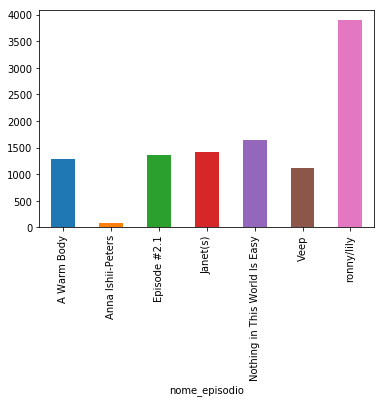

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

agrupamento1 = df.groupby("nome_episodio")["votos"].sum()
agrupamento1.plot.bar()

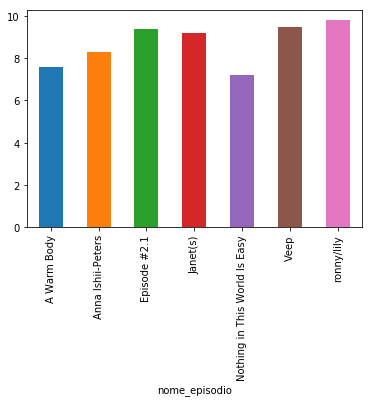

In [4]:
agrupamento2 = df.groupby("nome_episodio")["nota"].mean()
agrupamento2.plot.bar()